In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("../data/cleaned_fundme_data.csv")

# Parse date columns
df["created_at"] = pd.to_datetime(df["created_at"])
df["updated_at"] = pd.to_datetime(df["updated_at"])

# Create binary success label
df["success"] = df["goal_progress"] >= 1.0

# Drop duplicates and handle missing values
df.drop_duplicates(inplace=True)
df = df.dropna(subset=["goalamount", "goal_progress", "donation_count", "category_id", "funddescription"])


In [4]:
df["success"] = df["goal_progress"] >= 1.0


## EDA


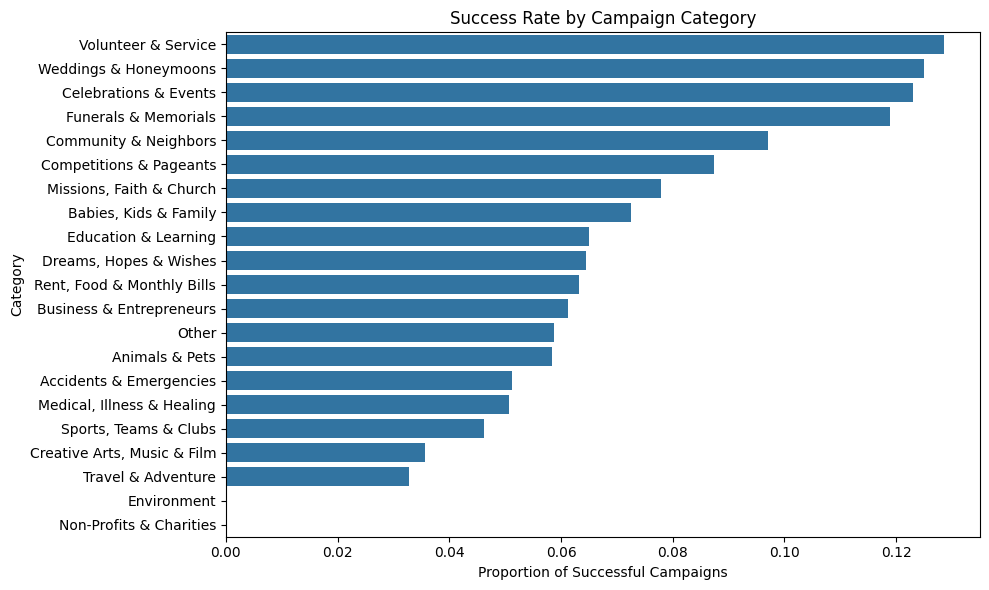

In [5]:
success_by_cat = df.groupby("cat_name")["success"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=success_by_cat.values, y=success_by_cat.index)
plt.title("Success Rate by Campaign Category")
plt.xlabel("Proportion of Successful Campaigns")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


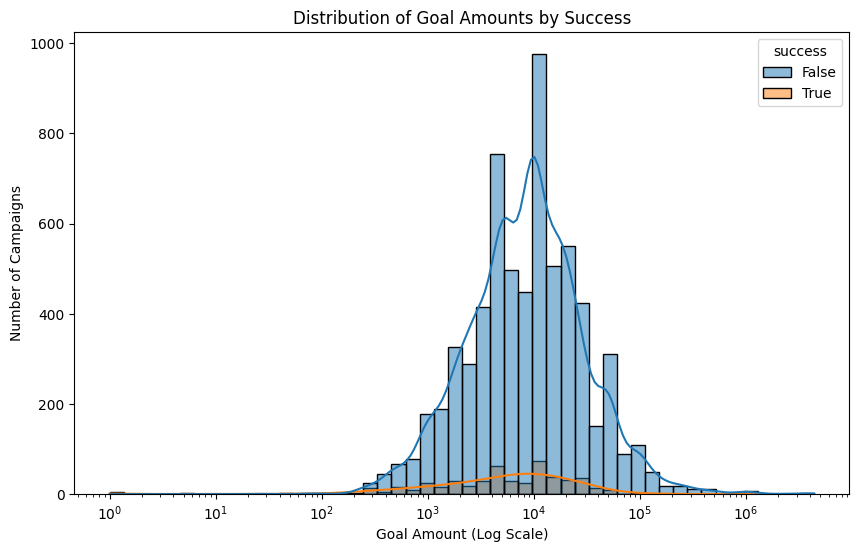

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="goalamount", hue="success", bins=50, log_scale=(True, False), kde=True)
plt.title("Distribution of Goal Amounts by Success")
plt.xlabel("Goal Amount (Log Scale)")
plt.ylabel("Number of Campaigns")
plt.show()


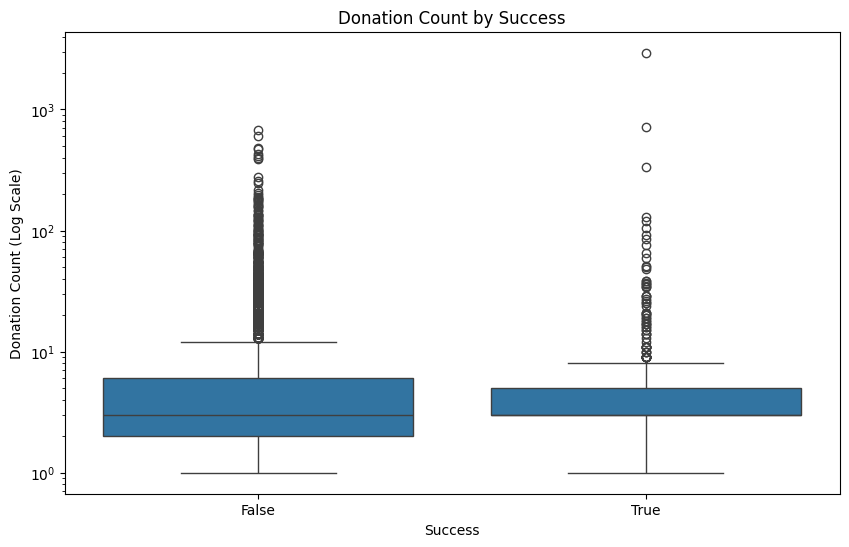

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x="success", y="donation_count", data=df)
plt.yscale("log")
plt.title("Donation Count by Success")
plt.xlabel("Success")
plt.ylabel("Donation Count (Log Scale)")
plt.show()
